In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
  

In [3]:
Cab_Data_df =pd.read_csv("C:/Users/roxan/Desktop/Cab investment/Dataset/Cab_Data.csv")
Cab_Data_df.info()
Customer_ID_df =pd.read_csv("C:/Users/roxan/Desktop/Cab investment/Dataset/Customer_ID.csv")
Customer_ID_df.info()
Transaction_ID_df =pd.read_csv("C:/Users/roxan/Desktop/Cab investment/Dataset/Transaction_ID.csv")
Transaction_ID_df.info()
#did not use the dataset City.csv due to data being combined on the three years and the population and users could not be the same if spread per year

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date Travel     359392 non-null  object 
 2   Company         359392 non-null  object 
 3       City        359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3),

In [4]:
# Merging of the datasets Customer_ID_df, Transaction_ID_df and Cab_Data_df; the City_df dataset has not been used due to the data not being a true representation of the population of 
# as people living in the city being the same for all three years and also the number of users. 
df1 = pd.merge(Customer_ID_df, Transaction_ID_df)
cab_df = pd.merge(Cab_Data_df, df1)


In [5]:
cab_df.describe(include='all')

,Transaction ID,Date Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
count,3.593920e+05,359392,359392,359392,359392.000000,359392.000000,359392.000000,359392.000000,359392,359392.000000,359392.000000,359392
unique,NaN,1095,2,19,NaN,NaN,NaN,NaN,2,NaN,NaN,2
top,NaN,05/01/2018,Yellow Cab,NEW YORK NY,NaN,NaN,NaN,NaN,Male,NaN,NaN,Card
freq,NaN,2022,274681,99885,NaN,NaN,NaN,NaN,205912,NaN,NaN,215504
mean,1.022076e+07,NaN,NaN,NaN,22.567254,423.443311,286.190113,19191.652115,NaN,35.336705,15048.822937,NaN
std,1.268058e+05,NaN,NaN,NaN,12.233526,274.378911,157.993661,21012.412463,NaN,12.594234,7969.409482,NaN
min,1.000001e+07,NaN,NaN,NaN,1.900000,15.600000,19.000000,1.000000,NaN,18.000000,2000.000000,NaN
25%,1.011081e+07,NaN,NaN,NaN,12.000000,206.437500,151.200000,2705.000000,NaN,25.000000,8424.000000,NaN
50%,1.022104e+07,NaN,NaN,NaN,22.440000,386.360000,282.480000,7459.000000,NaN,33.000000,14685.000000,NaN
75%,1.033094e+07,NaN,NaN,NaN,32.960000,583.660000,413.683200,36078.000000,NaN,42.000000,21035.000000,NaN


In [6]:
cab_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date Travel         359392 non-null  object 
 2   Company             359392 non-null  object 
 3       City            359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Gender              359392 non-null  object 
 9   Age                 359392 non-null  int64  
 10  Income (USD/Month)  359392 non-null  int64  
 11  Payment_Mode        359392 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 35.6+ MB


In [7]:
#missing values
cab_df.isnull()

,Transaction ID,Date Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,False,False,False,False,False,False,False,False,False,False,False,False
359388,False,False,False,False,False,False,False,False,False,False,False,False
359389,False,False,False,False,False,False,False,False,False,False,False,False
359390,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
#removing missing values
cab_df.dropna()

,Transaction ID,Date Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Male,28,10813,Card
1,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Male,27,9237,Card
2,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Male,53,11242,Cash
3,10000014,07/01/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Male,23,23327,Cash
4,10000015,03/01/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Male,33,8536,Card
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,08/01/2018,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Male,24,15651,Cash
359388,10440104,04/01/2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Male,32,6528,Cash
359389,10440105,05/01/2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Male,56,7966,Cash
359390,10440106,05/01/2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Male,32,6423,Card


In [9]:
#removing duplicates
cab_df.drop_duplicates()

,Transaction ID,Date Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Male,28,10813,Card
1,10000012,06/01/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Male,27,9237,Card
2,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Male,53,11242,Cash
3,10000014,07/01/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Male,23,23327,Cash
4,10000015,03/01/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Male,33,8536,Card
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,08/01/2018,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Male,24,15651,Cash
359388,10440104,04/01/2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Male,32,6528,Cash
359389,10440105,05/01/2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Male,56,7966,Cash
359390,10440106,05/01/2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Male,32,6423,Card


In [10]:
#round the columns

cab_df['KM Travelled']= round(cab_df['KM Travelled'])
print(cab_df)
cab_df['Price Charged']= round(cab_df['Price Charged'])
cab_df['Cost of Trip']= round(cab_df['Cost of Trip'])

        Transaction ID Date Travel     Company           City  KM Travelled  \
0             10000011  08/01/2016    Pink Cab     ATLANTA GA          30.0   
1             10000012  06/01/2016    Pink Cab     ATLANTA GA          29.0   
2             10000013  02/01/2016    Pink Cab     ATLANTA GA           9.0   
3             10000014  07/01/2016    Pink Cab     ATLANTA GA          33.0   
4             10000015  03/01/2016    Pink Cab     ATLANTA GA           9.0   
...                ...         ...         ...            ...           ...   
359387        10440101  08/01/2018  Yellow Cab  WASHINGTON DC           5.0   
359388        10440104  04/01/2018  Yellow Cab  WASHINGTON DC           8.0   
359389        10440105  05/01/2018  Yellow Cab  WASHINGTON DC          28.0   
359390        10440106  05/01/2018  Yellow Cab  WASHINGTON DC           9.0   
359391        10440107  02/01/2018  Yellow Cab  WASHINGTON DC          13.0   

        Price Charged  Cost of Trip  Customer ID Ge

In [11]:
cab_df.shape

(359392, 12)

In [12]:
cab_df.columns

Index(['Transaction ID', 'Date Travel', 'Company', '    City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Gender', 'Age',
       'Income (USD/Month)', 'Payment_Mode'],
      dtype='object')

In [13]:
cab_df = cab_df.rename(columns={'Payment_Mode': 'Payment Mode'})

In [14]:
cab_df.info()
cab_df.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date Travel         359392 non-null  object 
 2   Company             359392 non-null  object 
 3       City            359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Gender              359392 non-null  object 
 9   Age                 359392 non-null  int64  
 10  Income (USD/Month)  359392 non-null  int64  
 11  Payment Mode        359392 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 35.6+ MB


Transaction ID          int64
Date Travel            object
Company                object
    City               object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Customer ID             int64
Gender                 object
Age                     int64
Income (USD/Month)      int64
Payment Mode           object
dtype: object

In [15]:
#remove of non relevant variable
df = cab_df.drop( ['Customer ID'], axis = 1)
df

,Transaction ID,Date Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Payment Mode
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.0,371.0,314.0,Male,28,10813,Card
1,10000012,06/01/2016,Pink Cab,ATLANTA GA,29.0,359.0,335.0,Male,27,9237,Card
2,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.0,125.0,98.0,Male,53,11242,Cash
3,10000014,07/01/2016,Pink Cab,ATLANTA GA,33.0,377.0,352.0,Male,23,23327,Cash
4,10000015,03/01/2016,Pink Cab,ATLANTA GA,9.0,115.0,98.0,Male,33,8536,Card
...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,08/01/2018,Yellow Cab,WASHINGTON DC,5.0,69.0,63.0,Male,24,15651,Cash
359388,10440104,04/01/2018,Yellow Cab,WASHINGTON DC,8.0,114.0,107.0,Male,32,6528,Cash
359389,10440105,05/01/2018,Yellow Cab,WASHINGTON DC,28.0,437.0,350.0,Male,56,7966,Cash
359390,10440106,05/01/2018,Yellow Cab,WASHINGTON DC,9.0,146.0,114.0,Male,32,6423,Card


Text(0.5, 1.0, 'KM Travelled')

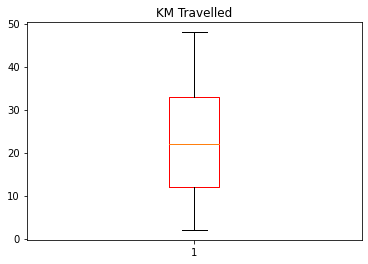

In [16]:
#detecting outliers by creating boxplots of numerical data
plt.boxplot(df['KM Travelled'], boxprops=dict(color='red'))
plt.title('KM Travelled')

Text(0.5, 1.0, 'Price Charged')

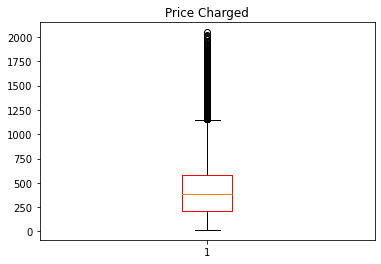

In [17]:
plt.boxplot(df['Price Charged'], boxprops=dict(color='red'))
plt.title('Price Charged')

<AxesSubplot:xlabel='KM Travelled', ylabel='Price Charged'>

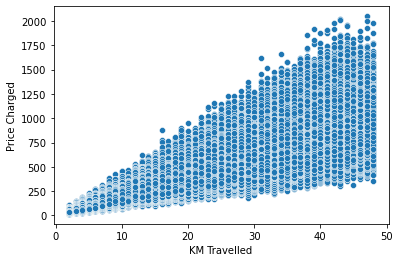

In [18]:
#Creating scatterplot to check if there is a corellation between Price Charged and KM Travelled variables
sns.scatterplot(x='KM Travelled', y='Price Charged', data = df)
#it can be seen that there is a positive corelation between the Price Chrged and KM Travelled so they are not considered outliers

Text(0.5, 1.0, 'Cost of Trip')

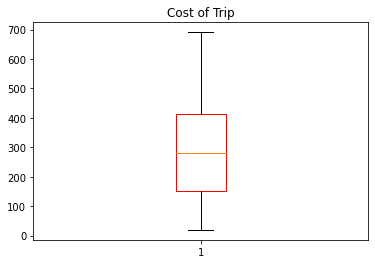

In [19]:
plt.boxplot(df['Cost of Trip'], boxprops=dict(color='red'))
plt.title('Cost of Trip')

Text(0.5, 1.0, 'Income')

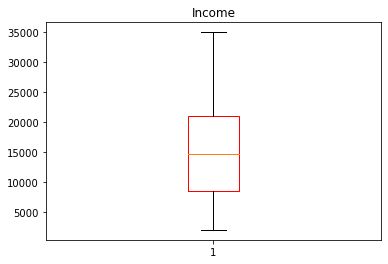

In [20]:
plt.boxplot(df['Income (USD/Month)'], boxprops=dict(color='red'))
plt.title('Income')

In [21]:
#using the correlation method to see the relationships between the continous variables
df.corr()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month)
Transaction ID,1.000000,-0.001424,-0.052900,-0.003460,-0.001267,-0.001570
KM Travelled,-0.001424,1.000000,0.835502,0.981579,-0.000433,-0.000600
Price Charged,-0.052900,0.835502,1.000000,0.859811,-0.003082,0.003224
Cost of Trip,-0.003460,0.981579,0.859811,1.000000,-0.000189,-0.000632
Age,-0.001267,-0.000433,-0.003082,-0.000189,1.000000,0.003907
Income (USD/Month),-0.001570,-0.000600,0.003224,-0.000632,0.003907,1.000000


In [22]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
#from the corelation map it can be seen that there is a positive corellation between KM travelled and Price Charged, KM Travelled and Cost of Trip, Price Charged and Cost of Trip

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month)
Transaction ID,1.000000,-0.001424,-0.052900,-0.003460,-0.001267,-0.001570
KM Travelled,-0.001424,1.000000,0.835502,0.981579,-0.000433,-0.000600
Price Charged,-0.052900,0.835502,1.000000,0.859811,-0.003082,0.003224
Cost of Trip,-0.003460,0.981579,0.859811,1.000000,-0.000189,-0.000632
Age,-0.001267,-0.000433,-0.003082,-0.000189,1.000000,0.003907
Income (USD/Month),-0.001570,-0.000600,0.003224,-0.000632,0.003907,1.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date Travel         359392 non-null  object 
 2   Company             359392 non-null  object 
 3       City            359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Gender              359392 non-null  object 
 8   Age                 359392 non-null  int64  
 9   Income (USD/Month)  359392 non-null  int64  
 10  Payment Mode        359392 non-null  object 
 11  Margins             359392 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 35.6+ MB


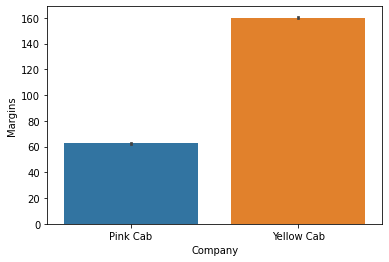

In [23]:
#calculating the Margins and creating the column called Margins
df['Margins'] = (df['Price Charged']-df['Cost of Trip'])
df.head()
df.info()
sns.barplot(x = 'Company', y = 'Margins', data = df)
plt.show()
#From the barplot it can be seen that the Yellow Cab company has higher margins than the Pink Cab company

(array([41817., 42953., 35122., 43016., 34854., 42778., 42721., 34899.,
        30490., 10742.]),
 array([ 2. ,  6.6, 11.2, 15.8, 20.4, 25. , 29.6, 34.2, 38.8, 43.4, 48. ]),
 <BarContainer object of 10 artists>)

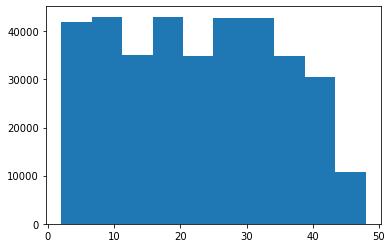

In [24]:
#creating histograms to check distribution of the main variables
import matplotlib.pyplot as plt
plt.hist(df['KM Travelled'])


(array([2.13200e+03, 2.15101e+05, 8.90990e+04, 3.22010e+04, 1.37710e+04,
        5.11800e+03, 1.52200e+03, 3.65000e+02, 6.40000e+01, 1.90000e+01]),
 array([-220. ,  -51.6,  116.8,  285.2,  453.6,  622. ,  790.4,  958.8,
        1127.2, 1295.6, 1464. ]),
 <BarContainer object of 10 artists>)

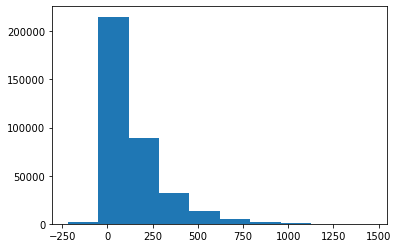

In [25]:
plt.hist(df['Margins'])

(array([9.64270e+04, 1.00935e+05, 8.68970e+04, 4.43950e+04, 1.91750e+04,
        8.09000e+03, 2.71100e+03, 6.29000e+02, 1.12000e+02, 2.10000e+01]),
 array([  16. ,  219.2,  422.4,  625.6,  828.8, 1032. , 1235.2, 1438.4,
        1641.6, 1844.8, 2048. ]),
 <BarContainer object of 10 artists>)

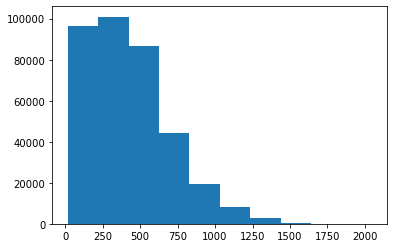

In [26]:
plt.hist(df['Price Charged'])

(array([45632., 45821., 46003., 45693., 46292., 45887., 41533., 28419.,
        11870.,  2242.]),
 array([ 19. ,  86.2, 153.4, 220.6, 287.8, 355. , 422.2, 489.4, 556.6,
        623.8, 691. ]),
 <BarContainer object of 10 artists>)

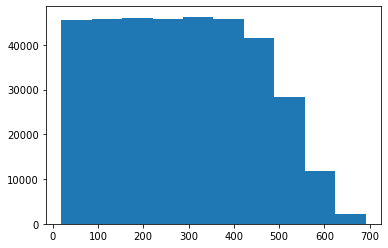

In [27]:
plt.hist(df['Cost of Trip'])

(array([ 9129.,  7867., 15979., 17699., 17111., 34708., 43071., 60195.,
        77502., 76131.]),
 array([0.69314718, 1.01095256, 1.32875795, 1.64656333, 1.96436871,
        2.2821741 , 2.59997948, 2.91778486, 3.23559024, 3.55339563,
        3.87120101]),
 <BarContainer object of 10 artists>)

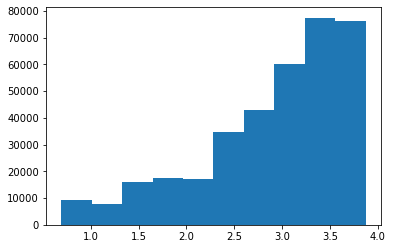

In [28]:
# From the histograms above it can be seen that data is not normal distributed. Log transformation has been applied but still it did not improve its normality. 
#To test hypothesis than non parametric methods will be used.
data_log = np.log(df['KM Travelled'])
plt.hist(data_log)



(array([  631.,  6904., 12933., 21630., 35059., 56917., 89950., 96786.,
        35685.,  2897.]),
 array([2.77258872, 3.25779175, 3.74299478, 4.2281978 , 4.71340083,
        5.19860385, 5.68380688, 6.16900991, 6.65421293, 7.13941596,
        7.62461899]),
 <BarContainer object of 10 artists>)

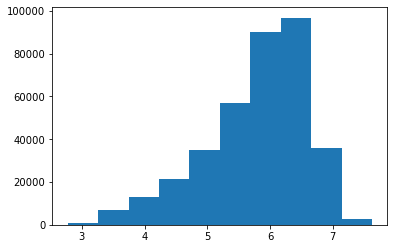

In [29]:
data_log_1 = np.log(df['Price Charged'])
plt.hist(data_log_1)

(array([ 4877.,  7045., 12215., 16587., 24043., 34218., 48758., 69206.,
        95847., 46596.]),
 array([2.94443898, 3.30380906, 3.66317915, 4.02254923, 4.38191932,
        4.7412894 , 5.10065949, 5.46002957, 5.81939965, 6.17876974,
        6.53813982]),
 <BarContainer object of 10 artists>)

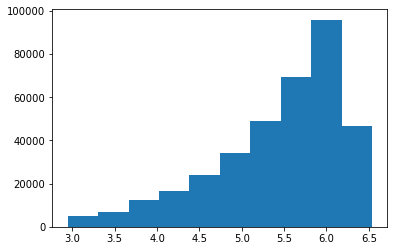

In [30]:
data_log_2 = np.log(df['Cost of Trip'])
plt.hist(data_log_2)

In [31]:
#Hypothesis testing
# H0 There is no significant change in the Margins of Pink Cab company due to gender of passangers.
# H1 There is significant change in the Margins of the Pink Cab Company due to the gender of passangers.
from scipy import stats
group1= df[(df.Gender =='Female') & (df.Company=='Pink Cab')].groupby('Transaction ID').Margins.mean()
group2 = df[(df.Gender =='Male') & (df.Company=='Pink Cab')].groupby('Transaction ID').Margins.mean()
print(group1.shape[0],group2.shape[0])
ttest,pvalue = stats.mannwhitneyu(group1,group2, alternative="two-sided")
print("p-value:%.4f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")
#The p value is 0.1263 which is more than 0.5 so it failed to reject null hypothesis 
#  meaning that there is no significant change in the Margin due to gender for Pink Cab company.

37480 47231
p-value:0.1263
Fail to reject null hypothesis


In [32]:

# Ho There is no significant change in the Margins of Yellow Cab company due to gender of passangers.
# HA There is significant change in the Margins of Yellow Cab company due to the gender of passangers.
from scipy import stats
group1= df[(df.Gender =='Female') & (df.Company=='Yellow Cab')].groupby('Transaction ID').Margins.mean()
group2 = df[(df.Gender =='Male') & (df.Company=='Yellow Cab')].groupby('Transaction ID').Margins.mean()
print(group1.shape[0],group2.shape[0])
ttest,pvalue = stats.mannwhitneyu(group1,group2, alternative="two-sided")
print("p-value:%.4f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")
#The null hypothesis has been rejected meaning that the alternative hypothesis 
# has been accepted and that there is significant change in the Margin of Yeallow Cab due to the gender of passengers.

116000 158681
p-value:0.0000
Reject null hypothesis


In [33]:
#The two hypothesis above confirmed that Gender does have a significant effect over Margins for the Yellow Cab company but not for the Pink Cab company.

In [34]:
#creating crosstab
crosstab= pd.crosstab(df.Company, df.Gender)
#From this crosstabulation it can be seen that Yellow Cab has more customers than Pink Cab and that both companies have more male customers than female.
crosstab


Gender,Female,Male
Company,,
Pink Cab,37480,47231
Yellow Cab,116000,158681


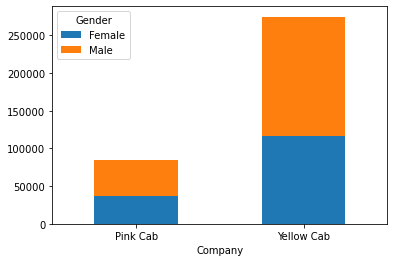

In [35]:
pl = crosstab.plot(kind='bar', stacked=True, rot=0)

In [36]:
crosstab=pd.crosstab(index=df['Company'], columns=df['Payment Mode'])
crosstab
#From this crosstabulation it can be seen that Yellow Cab has more customers than Pink Cab.
#From this crosstabulation it can be observed that both companies have most payments made by card

Payment Mode,Card,Cash
Company,,
Pink Cab,50719,33992
Yellow Cab,164785,109896


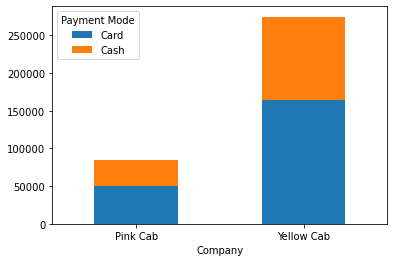

In [37]:
pl = crosstab.plot(kind='bar', stacked=True, rot=0)

In [38]:
table = pd.pivot_table(df, index = "Date Travel", values = ["KM Travelled"], aggfunc = "sum", columns ='Company')
table

KM Travelled           
Company         Pink Cab Yellow Cab
Date Travel                        
01/01/2017        4703.0    15648.0
01/01/2018        2013.0     6145.0
01/02/2016         273.0     1972.0
01/02/2017         317.0     2171.0
01/02/2018         746.0     2911.0
...                  ...        ...
31/10/2017        1550.0     5184.0
31/10/2018        1465.0     4463.0
31/12/2016        4068.0    14509.0
31/12/2017        4258.0    11920.0
31/12/2018        1383.0     4492.0

[1095 rows x 2 columns]

array([<AxesSubplot:xlabel='Date Travel'>,
       <AxesSubplot:xlabel='Date Travel'>], dtype=object)

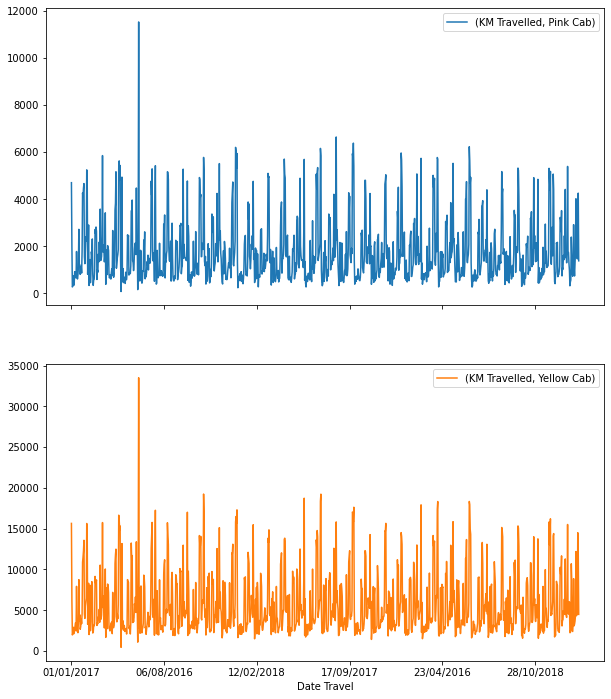

In [39]:
table.plot(subplots=True, figsize=(10,12))
#From this plots it can be seen that the Yellow Cab company has travelled more km than the Pink Cab company.


In [40]:
table1 = pd.pivot_table(df, index = "Transaction ID", values = ["Price Charged"], aggfunc = "mean", columns ='Company')
table1



Price Charged           
Company             Pink Cab Yellow Cab
Transaction ID                         
10000011               371.0        NaN
10000012               359.0        NaN
10000013               125.0        NaN
10000014               377.0        NaN
10000015               115.0        NaN
...                      ...        ...
10440101                 NaN       69.0
10440104                 NaN      114.0
10440105                 NaN      437.0
10440106                 NaN      146.0
10440107                 NaN      192.0

[359392 rows x 2 columns]

In [41]:
table1.describe()
#It can be observed that the minimum price charged by Pink Cab company is 260.01 and the maximum price charged is 357.07 while 
# the Yellow Cab company has higher price charged minimum price charged is 359.14 and the maximum price charged is 604.83


Price Charged               
Company      Pink Cab     Yellow Cab
count    84711.000000  274681.000000
mean       310.800545     458.181308
std        181.996111     288.385383
min         16.000000      21.000000
25%        160.000000     227.000000
50%        298.000000     425.000000
75%        442.000000     634.000000
max       1623.000000    2048.000000

array([<AxesSubplot:xlabel='Transaction ID'>,
       <AxesSubplot:xlabel='Transaction ID'>], dtype=object)

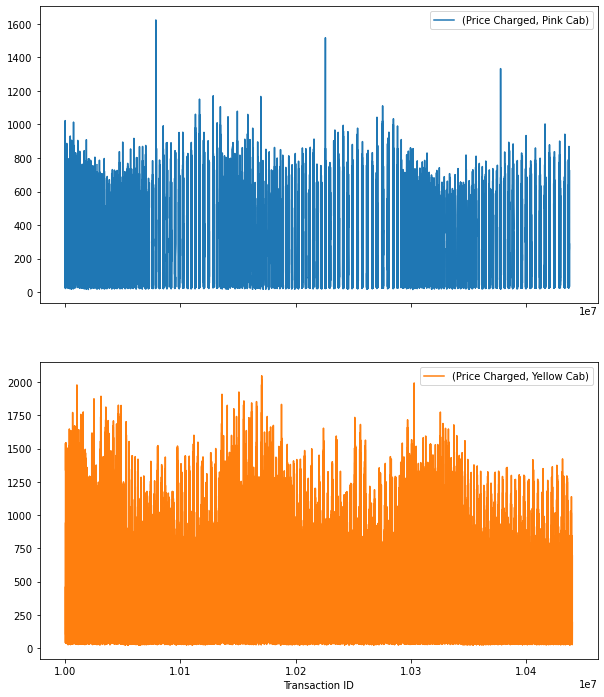

In [42]:
table1.plot(subplots=True, figsize=(10,12))

In [43]:
#calculating the price charged per kM and creating the column called Price Per KM
df['Price KM'] = (df['Cost of Trip'] // df['KM Travelled'])
df.head()
df

,Transaction ID,Date Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Payment Mode,Margins,Price KM
0,10000011,08/01/2016,Pink Cab,ATLANTA GA,30.0,371.0,314.0,Male,28,10813,Card,57.0,10.0
1,10000012,06/01/2016,Pink Cab,ATLANTA GA,29.0,359.0,335.0,Male,27,9237,Card,24.0,11.0
2,10000013,02/01/2016,Pink Cab,ATLANTA GA,9.0,125.0,98.0,Male,53,11242,Cash,27.0,10.0
3,10000014,07/01/2016,Pink Cab,ATLANTA GA,33.0,377.0,352.0,Male,23,23327,Cash,25.0,10.0
4,10000015,03/01/2016,Pink Cab,ATLANTA GA,9.0,115.0,98.0,Male,33,8536,Card,17.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,08/01/2018,Yellow Cab,WASHINGTON DC,5.0,69.0,63.0,Male,24,15651,Cash,6.0,12.0
359388,10440104,04/01/2018,Yellow Cab,WASHINGTON DC,8.0,114.0,107.0,Male,32,6528,Cash,7.0,13.0
359389,10440105,05/01/2018,Yellow Cab,WASHINGTON DC,28.0,437.0,350.0,Male,56,7966,Cash,87.0,12.0
359390,10440106,05/01/2018,Yellow Cab,WASHINGTON DC,9.0,146.0,114.0,Male,32,6423,Card,32.0,12.0


In [44]:
table2 = pd.pivot_table(df, index = "Company", values = ["Price KM"], aggfunc = "mean",)
table2


,Price KM
Company,
Pink Cab,10.577611
Yellow Cab,12.791591


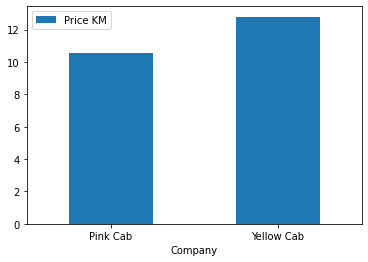

In [45]:
pl = table2.plot(kind='bar', stacked=True, rot=0)


In [46]:
#Creating two new columns that shows the month and the year in order to be able to analyse the seasonality of number of customers using the cab service.
df['Date Travel'] = pd.to_datetime(df['Date Travel'])
df['Year'] = df['Date Travel'].dt.year
df['Month'] = df['Date Travel'].dt.month
print(df)    

        Transaction ID Date Travel     Company           City  KM Travelled  \
0             10000011  2016-08-01    Pink Cab     ATLANTA GA          30.0   
1             10000012  2016-06-01    Pink Cab     ATLANTA GA          29.0   
2             10000013  2016-02-01    Pink Cab     ATLANTA GA           9.0   
3             10000014  2016-07-01    Pink Cab     ATLANTA GA          33.0   
4             10000015  2016-03-01    Pink Cab     ATLANTA GA           9.0   
...                ...         ...         ...            ...           ...   
359387        10440101  2018-08-01  Yellow Cab  WASHINGTON DC           5.0   
359388        10440104  2018-04-01  Yellow Cab  WASHINGTON DC           8.0   
359389        10440105  2018-05-01  Yellow Cab  WASHINGTON DC          28.0   
359390        10440106  2018-05-01  Yellow Cab  WASHINGTON DC           9.0   
359391        10440107  2018-02-01  Yellow Cab  WASHINGTON DC          13.0   

        Price Charged  Cost of Trip Gender  Age  In

In [47]:
table3 = df.groupby(["Company",'Month','Year']).Gender.count()
table3

Company     Month  Year
Pink Cab    1      2016     1290
                   2017     1843
                   2018     1601
            2      2016     1467
                   2017     1577
                           ...  
Yellow Cab  11     2017     9022
                   2018     9060
            12     2016     8983
                   2017    10818
                   2018    10334
Name: Gender, Length: 72, dtype: int64

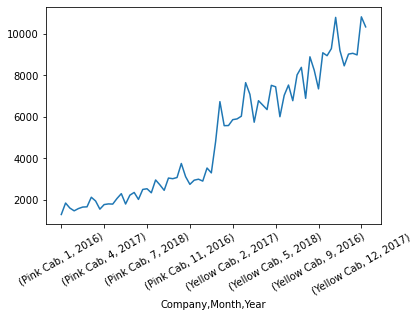

In [48]:
table3.plot()
plt.xticks(rotation=30)
plt.show()
#From the plot it can bee seen that Pink Cab company has in all three years a lower number of customers comparing to the Yellow Cab company.

In [49]:
series= table3.to_frame()
series

Gender
Company    Month Year        
Pink Cab   1     2016    1290
                 2017    1843
                 2018    1601
           2     2016    1467
                 2017    1577
...                       ...
Yellow Cab 11    2017    9022
                 2018    9060
           12    2016    8983
                 2017   10818
                 2018   10334

[72 rows x 1 columns]

In [50]:
series.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 72 entries, ('Pink Cab', 1, 2016) to ('Yellow Cab', 12, 2018)
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gender  72 non-null     int64
dtypes: int64(1)
memory usage: 1.2+ KB


In [51]:
import warnings
warnings.filterwarnings("ignore")

In [52]:
#changed Gender name with Passengers
series= series.rename(columns = {"Gender": "Passengers"})
series

Passengers
Company    Month Year            
Pink Cab   1     2016        1290
                 2017        1843
                 2018        1601
           2     2016        1467
                 2017        1577
...                           ...
Yellow Cab 11    2017        9022
                 2018        9060
           12    2016        8983
                 2017       10818
                 2018       10334

[72 rows x 1 columns]

<AxesSubplot:xlabel='Company,Month'>

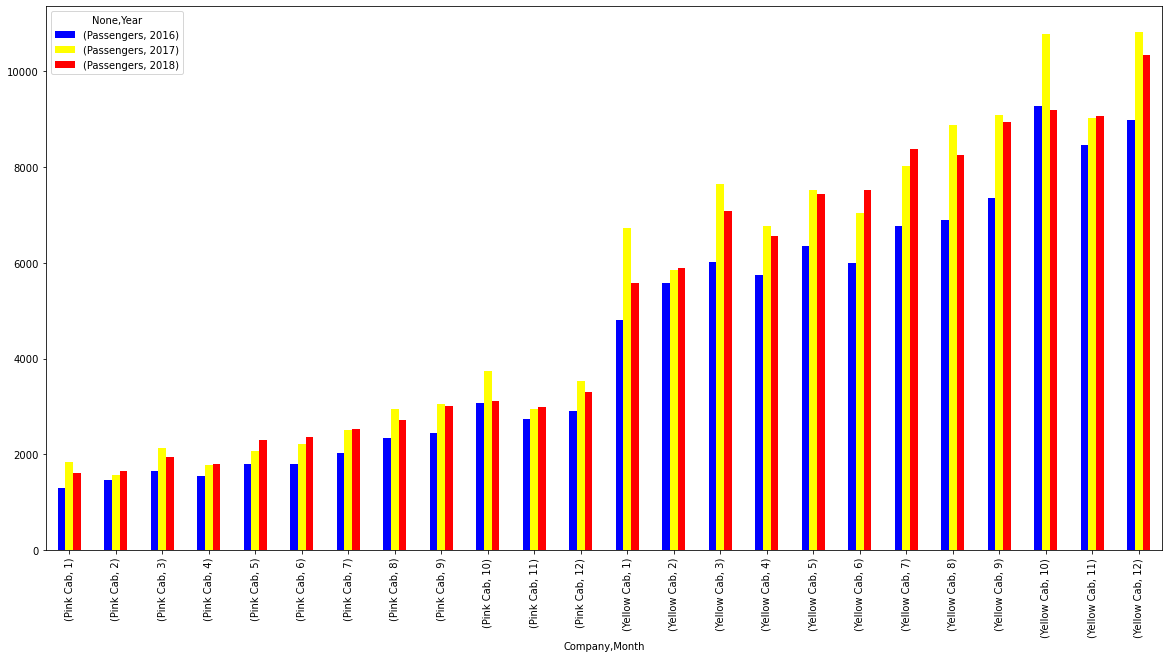

In [53]:
fig, ax = plt.subplots(figsize=(20,10))
series.unstack().plot(ax=ax, kind = 'bar', color = ['blue','yellow', 'red'])

In [54]:
#Hypothesis testing
# H0 There is no significant change in the Margins of Pink Cab company due to age of passengers.
# H1 There is significant change in the Margins of the Pink Cab Company due to the ageof passangers.
from scipy import stats
group1= df[(df.Age) & (df.Company=='Pink Cab')].groupby('Transaction ID').Margins.mean()
group2 = df[(df.Age) & (df.Company=='Pink Cab')].groupby('Transaction ID').Margins.mean()
print(group1.shape[0],group2.shape[0])
ttest,pvalue = stats.mannwhitneyu(group1,group2, alternative="two-sided")
print("p-value:%.4f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")
#The p value is 1 which is more than 0.5 so it failed to reject null hypothesis 
#It means that there is no significant change in the Margin due to age for Pink Cab company.

41529 41529
p-value:1.0000
Fail to reject null hypothesis


In [55]:
#Hypothesis testing
# H0 There is no significant change in the Margins of Pink Cab company due to age of passengers.
# H1 There is significant change in the Margins of the Pink Cab Company due to the age of passangers.
from scipy import stats
group1= df[(df.Age) & (df.Company=='Yellow Cab')].groupby('Transaction ID').Margins.mean()
group2 = df[(df.Age) & (df.Company=='Yellow Cab')].groupby('Transaction ID').Margins.mean()
print(group1.shape[0],group2.shape[0])
ttest,pvalue = stats.mannwhitneyu(group1,group2, alternative="two-sided")
print("p-value:%.4f" % pvalue)
if pvalue <0.05:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")
#The p value is 1 which is more than 0.5 so it failed to reject null hypothesis 
# It means that there is no significant change in the Margin due to age for Yellow Cab company.

134520 134520
p-value:1.0000
Fail to reject null hypothesis
